In [11]:
!pip install statsmodels


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


Defaulting to user installation because normal site-packages is not writeable


In [12]:
# reading the dataset using read_csv
df = pd.read_csv("stock_data.csv", 
                 parse_dates=True, 
                 index_col="Date")

# displaying the first five rows of dataset
df.head()


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [15]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')


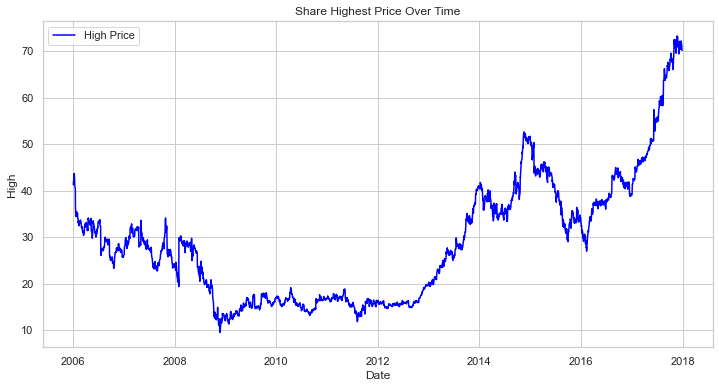

In [16]:
# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()


'Date' is already the index or not present in the DataFrame.


<Figure size 864x432 with 0 Axes>

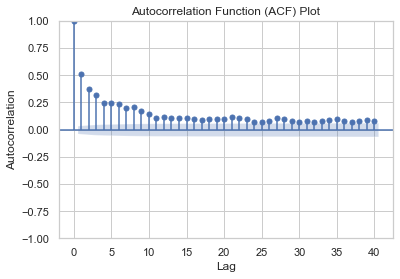

In [19]:
# Check if 'Date' is already the index
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

# This code is modified by Susobhan Akhuli

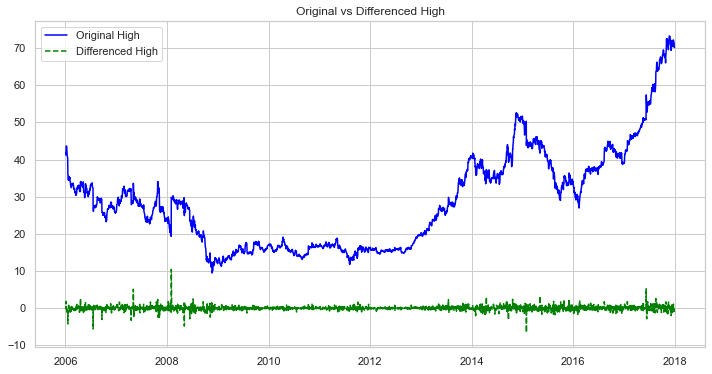

In [20]:
# Differencing
df['high_diff'] = df['High'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

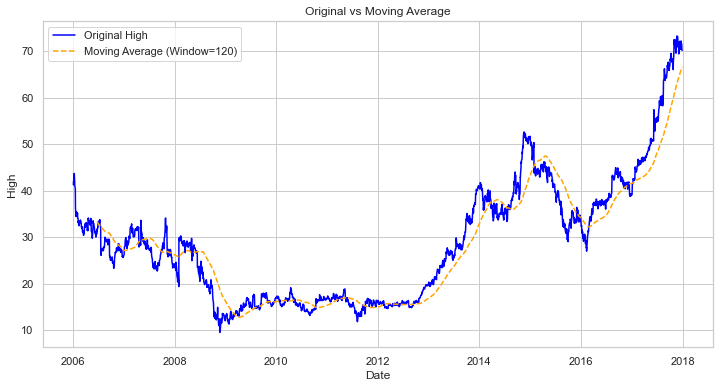

In [21]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

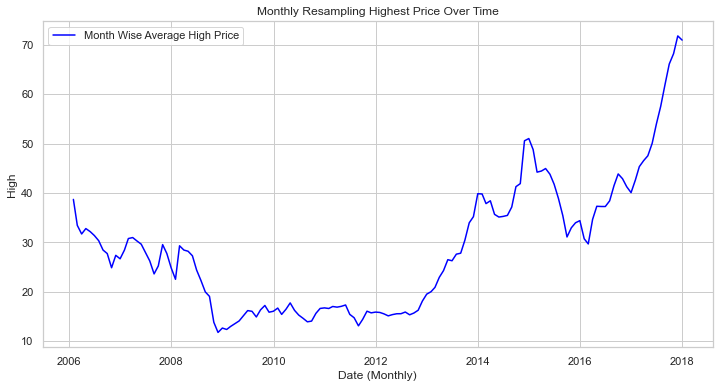

In [23]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean()  # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

# Plotting the 'High' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()
